In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv(r'D:\Study\深度学习\日月光华-tensorflow入门与实战资料\数据集\Leaf classification/train.csv')

In [3]:
data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


In [5]:
labels=pd.factorize(data.species)[0]

In [6]:
x=data[data.columns[2:]]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_x,test_x,train_y,test_y=train_test_split(x,labels)

In [9]:
train_x.shape,test_x.shape

((742, 192), (248, 192))

In [11]:
mean = train_x.mean(axis=0)
std = train_x.std(axis=0)

In [12]:
train_x=(train_x-mean)/std
test_x=(test_x-mean)/std

把每一条数据看成一个序列

一维卷积或者LSTM sample,step,feature

In [13]:
train_x

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
341,-0.476223,-0.428364,3.582414,-0.553485,-0.456149,0.207869,-0.651980,-0.405625,-0.370123,-0.921539,...,-0.192536,-0.260532,0.029528,-0.465994,-0.866293,-0.235593,-0.239933,-0.210288,-0.594373,1.850323
737,-0.875791,-0.732971,-0.488174,0.000300,1.116091,-0.739095,-1.085809,-0.405625,3.544298,-1.044225,...,-0.497732,-0.260532,0.783841,-0.465994,-0.866293,-0.235593,-0.239933,-0.562988,-0.663383,-0.847412
471,-0.875791,-0.732971,1.288130,4.707151,-0.351340,-0.739095,-0.977352,-0.405625,0.041888,-1.044225,...,-0.497732,1.502884,-0.446882,-0.176301,0.161372,-0.138474,4.626684,-0.298470,-0.456425,0.828454
909,2.620631,3.379062,-0.414166,-0.830342,-0.770575,1.382207,-0.760438,-0.405625,-0.164118,-0.430733,...,-0.561978,4.423552,-0.407164,-0.259064,-0.095594,-0.235593,0.202503,0.583265,-0.387487,0.542328
361,-0.676007,-0.377600,-0.710198,-0.068950,-0.456149,-0.549694,-0.218096,-0.405625,-0.164118,0.428130,...,-0.144342,-0.260532,1.577830,-0.465994,-0.545201,-0.235593,-0.239933,-0.562988,0.854116,-0.275159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,-0.576115,-0.479127,0.474005,0.623263,-0.456149,-0.019407,-1.085809,-0.405625,2.720171,-1.166910,...,0.578473,3.431638,-0.288052,-0.259064,0.097114,-0.235593,-0.239933,0.465708,-0.663383,-0.683924
449,1.721553,1.754601,-0.784206,-0.761128,-0.665766,1.571492,-0.435010,-0.405625,0.041888,1.041559,...,-0.224659,0.566045,-0.486559,-0.465994,-0.673651,-0.235593,-0.239933,1.229857,-0.111591,-0.152522
402,1.621661,0.383906,-1.080275,-0.138164,-0.246477,-0.284541,1.625788,-0.405625,-0.164118,2.513913,...,-0.561978,-0.260532,-0.685067,1.437691,2.152444,-0.235593,-0.239933,-0.004548,0.095367,-0.847412
320,0.023288,-0.529917,-0.044088,0.000300,-0.456149,-0.284541,2.493502,-0.405625,-0.782134,2.636599,...,-0.064042,-0.260532,-0.010149,-0.465994,-0.352494,-0.235593,-0.239933,-0.562988,-0.663383,0.910199


In [14]:
train_x =np.expand_dims(train_x,-1)

In [16]:
train_x.shape

(742, 192, 1)

In [17]:
test_x =np.expand_dims(test_x,-1)

In [24]:
model =keras.Sequential()
model.add(layers.Conv1D(32, 7, input_shape=(train_x.shape[1:]),activation='relu',padding='valid'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 7 ,activation='relu',padding='valid'))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(99,activation='softmax'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 186, 32)           256       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 62, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 56, 32)            7200      
_________________________________________________________________
global_average_pooling1d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 99)                3267      
Total params: 10,723
Trainable params: 10,723
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer=keras.optimizers.RMSprop(),
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [29]:
history=model.fit(train_x,train_y,
                 epochs=600,
                 batch_size=128,
                 validation_data=(test_x,test_y))

Epoch 1/600
6/6 [==============================] - 0s 61ms/step - loss: 4.5962 - acc: 0.0054 - val_loss: 4.5846 - val_acc: 0.0202
Epoch 2/600
6/6 [==============================] - 0s 5ms/step - loss: 4.5747 - acc: 0.0121 - val_loss: 4.5763 - val_acc: 0.0202
Epoch 3/600
6/6 [==============================] - 0s 5ms/step - loss: 4.5556 - acc: 0.0108 - val_loss: 4.5620 - val_acc: 0.0282
Epoch 4/600
6/6 [==============================] - 0s 5ms/step - loss: 4.5294 - acc: 0.0296 - val_loss: 4.5428 - val_acc: 0.0282
Epoch 5/600
6/6 [==============================] - 0s 5ms/step - loss: 4.4967 - acc: 0.0270 - val_loss: 4.5151 - val_acc: 0.0323
Epoch 6/600
6/6 [==============================] - 0s 5ms/step - loss: 4.4591 - acc: 0.0189 - val_loss: 4.4859 - val_acc: 0.0323
Epoch 7/600
6/6 [==============================] - 0s 5ms/step - loss: 4.4187 - acc: 0.0256 - val_loss: 4.4508 - val_acc: 0.0242
Epoch 8/600
6/6 [==============================] - 0s 5ms/step - loss: 4.3735 - acc: 0.0270 - va

6/6 [==============================] - 0s 6ms/step - loss: 3.0555 - acc: 0.1671 - val_loss: 3.1438 - val_acc: 0.1411
Epoch 65/600
6/6 [==============================] - 0s 6ms/step - loss: 3.0286 - acc: 0.1914 - val_loss: 3.1318 - val_acc: 0.1653
Epoch 66/600
6/6 [==============================] - 0s 6ms/step - loss: 3.0151 - acc: 0.1941 - val_loss: 3.0823 - val_acc: 0.1774
Epoch 67/600
6/6 [==============================] - 0s 6ms/step - loss: 3.0145 - acc: 0.1739 - val_loss: 3.0807 - val_acc: 0.1774
Epoch 68/600
6/6 [==============================] - 0s 6ms/step - loss: 2.9939 - acc: 0.1927 - val_loss: 3.1068 - val_acc: 0.1371
Epoch 69/600
6/6 [==============================] - 0s 6ms/step - loss: 2.9793 - acc: 0.2008 - val_loss: 3.0920 - val_acc: 0.1492
Epoch 70/600
6/6 [==============================] - 0s 5ms/step - loss: 2.9765 - acc: 0.2008 - val_loss: 3.0444 - val_acc: 0.1815
Epoch 71/600
6/6 [==============================] - 0s 6ms/step - loss: 2.9540 - acc: 0.2008 - val_loss

Epoch 127/600
6/6 [==============================] - 0s 6ms/step - loss: 2.4757 - acc: 0.3261 - val_loss: 2.6347 - val_acc: 0.2944
Epoch 128/600
6/6 [==============================] - 0s 6ms/step - loss: 2.4779 - acc: 0.3261 - val_loss: 2.6013 - val_acc: 0.2944
Epoch 129/600
6/6 [==============================] - 0s 6ms/step - loss: 2.4730 - acc: 0.3127 - val_loss: 2.6104 - val_acc: 0.2581
Epoch 130/600
6/6 [==============================] - 0s 6ms/step - loss: 2.4415 - acc: 0.3315 - val_loss: 2.6096 - val_acc: 0.2702
Epoch 131/600
6/6 [==============================] - 0s 6ms/step - loss: 2.4503 - acc: 0.3208 - val_loss: 2.5924 - val_acc: 0.2863
Epoch 132/600
6/6 [==============================] - 0s 6ms/step - loss: 2.4485 - acc: 0.3086 - val_loss: 2.5939 - val_acc: 0.2903
Epoch 133/600
6/6 [==============================] - 0s 6ms/step - loss: 2.4388 - acc: 0.3410 - val_loss: 2.6007 - val_acc: 0.2944
Epoch 134/600
6/6 [==============================] - 0s 6ms/step - loss: 2.4181 - a

6/6 [==============================] - 0s 6ms/step - loss: 2.0562 - acc: 0.4407 - val_loss: 2.3812 - val_acc: 0.3226
Epoch 190/600
6/6 [==============================] - 0s 6ms/step - loss: 2.0636 - acc: 0.4191 - val_loss: 2.3460 - val_acc: 0.3548
Epoch 191/600
6/6 [==============================] - 0s 6ms/step - loss: 2.0542 - acc: 0.4299 - val_loss: 2.2959 - val_acc: 0.3548
Epoch 192/600
6/6 [==============================] - 0s 6ms/step - loss: 2.0552 - acc: 0.4124 - val_loss: 2.2967 - val_acc: 0.3387
Epoch 193/600
6/6 [==============================] - 0s 6ms/step - loss: 2.0448 - acc: 0.4474 - val_loss: 2.2861 - val_acc: 0.3750
Epoch 194/600
6/6 [==============================] - 0s 6ms/step - loss: 2.0359 - acc: 0.4367 - val_loss: 2.2707 - val_acc: 0.3710
Epoch 195/600
6/6 [==============================] - 0s 6ms/step - loss: 2.0285 - acc: 0.4286 - val_loss: 2.2608 - val_acc: 0.3669
Epoch 196/600
6/6 [==============================] - 0s 6ms/step - loss: 2.0356 - acc: 0.4272 - v

6/6 [==============================] - 0s 6ms/step - loss: 1.7371 - acc: 0.5283 - val_loss: 2.0852 - val_acc: 0.4073
Epoch 252/600
6/6 [==============================] - 0s 6ms/step - loss: 1.7468 - acc: 0.5229 - val_loss: 2.0132 - val_acc: 0.4597
Epoch 253/600
6/6 [==============================] - 0s 6ms/step - loss: 1.7387 - acc: 0.5418 - val_loss: 2.0528 - val_acc: 0.4274
Epoch 254/600
6/6 [==============================] - 0s 6ms/step - loss: 1.7593 - acc: 0.5283 - val_loss: 2.0842 - val_acc: 0.4153
Epoch 255/600
6/6 [==============================] - 0s 6ms/step - loss: 1.7128 - acc: 0.5472 - val_loss: 2.0614 - val_acc: 0.4556
Epoch 256/600
6/6 [==============================] - 0s 6ms/step - loss: 1.7442 - acc: 0.5162 - val_loss: 2.0615 - val_acc: 0.4355
Epoch 257/600
6/6 [==============================] - 0s 6ms/step - loss: 1.7208 - acc: 0.5229 - val_loss: 2.0387 - val_acc: 0.3992
Epoch 258/600
6/6 [==============================] - 0s 6ms/step - loss: 1.7333 - acc: 0.5256 - v

6/6 [==============================] - 0s 6ms/step - loss: 1.5001 - acc: 0.5863 - val_loss: 1.8393 - val_acc: 0.4718
Epoch 314/600
6/6 [==============================] - 0s 5ms/step - loss: 1.4666 - acc: 0.6146 - val_loss: 1.9308 - val_acc: 0.4234
Epoch 315/600
6/6 [==============================] - 0s 6ms/step - loss: 1.4719 - acc: 0.6065 - val_loss: 1.9364 - val_acc: 0.4677
Epoch 316/600
6/6 [==============================] - 0s 6ms/step - loss: 1.4831 - acc: 0.6199 - val_loss: 1.8650 - val_acc: 0.5000
Epoch 317/600
6/6 [==============================] - 0s 6ms/step - loss: 1.4572 - acc: 0.6321 - val_loss: 1.8807 - val_acc: 0.4798
Epoch 318/600
6/6 [==============================] - 0s 6ms/step - loss: 1.4722 - acc: 0.5997 - val_loss: 1.8807 - val_acc: 0.4798
Epoch 319/600
6/6 [==============================] - 0s 6ms/step - loss: 1.4782 - acc: 0.6159 - val_loss: 1.8810 - val_acc: 0.4355
Epoch 320/600
6/6 [==============================] - 0s 6ms/step - loss: 1.4415 - acc: 0.6186 - v

6/6 [==============================] - 0s 6ms/step - loss: 1.2744 - acc: 0.6523 - val_loss: 1.7186 - val_acc: 0.5202
Epoch 376/600
6/6 [==============================] - 0s 6ms/step - loss: 1.2501 - acc: 0.6765 - val_loss: 1.6878 - val_acc: 0.5444
Epoch 377/600
6/6 [==============================] - 0s 6ms/step - loss: 1.2701 - acc: 0.6658 - val_loss: 1.7444 - val_acc: 0.5081
Epoch 378/600
6/6 [==============================] - 0s 6ms/step - loss: 1.2499 - acc: 0.6779 - val_loss: 1.7792 - val_acc: 0.5161
Epoch 379/600
6/6 [==============================] - 0s 6ms/step - loss: 1.2536 - acc: 0.6577 - val_loss: 1.7423 - val_acc: 0.5121
Epoch 380/600
6/6 [==============================] - 0s 6ms/step - loss: 1.2661 - acc: 0.6644 - val_loss: 1.7352 - val_acc: 0.5081
Epoch 381/600
6/6 [==============================] - 0s 6ms/step - loss: 1.2290 - acc: 0.6846 - val_loss: 1.7825 - val_acc: 0.4919
Epoch 382/600
6/6 [==============================] - 0s 6ms/step - loss: 1.2219 - acc: 0.6792 - v

6/6 [==============================] - 0s 6ms/step - loss: 1.0788 - acc: 0.7143 - val_loss: 1.6773 - val_acc: 0.5282
Epoch 438/600
6/6 [==============================] - 0s 6ms/step - loss: 1.0659 - acc: 0.7183 - val_loss: 1.6572 - val_acc: 0.5444
Epoch 439/600
6/6 [==============================] - 0s 5ms/step - loss: 1.0714 - acc: 0.7237 - val_loss: 1.6094 - val_acc: 0.5605
Epoch 440/600
6/6 [==============================] - 0s 6ms/step - loss: 1.0621 - acc: 0.7156 - val_loss: 1.5702 - val_acc: 0.5847
Epoch 441/600
6/6 [==============================] - 0s 6ms/step - loss: 1.0516 - acc: 0.7251 - val_loss: 1.5838 - val_acc: 0.5645
Epoch 442/600
6/6 [==============================] - 0s 6ms/step - loss: 1.0669 - acc: 0.7237 - val_loss: 1.6997 - val_acc: 0.5363
Epoch 443/600
6/6 [==============================] - 0s 5ms/step - loss: 1.0577 - acc: 0.7197 - val_loss: 1.6307 - val_acc: 0.5202
Epoch 444/600
6/6 [==============================] - 0s 6ms/step - loss: 1.0442 - acc: 0.7358 - v

6/6 [==============================] - 0s 7ms/step - loss: 0.9234 - acc: 0.7736 - val_loss: 1.5617 - val_acc: 0.5444
Epoch 500/600
6/6 [==============================] - 0s 7ms/step - loss: 0.9135 - acc: 0.7695 - val_loss: 1.5497 - val_acc: 0.5887
Epoch 501/600
6/6 [==============================] - 0s 6ms/step - loss: 0.9159 - acc: 0.7682 - val_loss: 1.5572 - val_acc: 0.5484
Epoch 502/600
6/6 [==============================] - 0s 6ms/step - loss: 0.9187 - acc: 0.7426 - val_loss: 1.5391 - val_acc: 0.5766
Epoch 503/600
6/6 [==============================] - 0s 6ms/step - loss: 0.9040 - acc: 0.7655 - val_loss: 1.4724 - val_acc: 0.5847
Epoch 504/600
6/6 [==============================] - 0s 6ms/step - loss: 0.8984 - acc: 0.7668 - val_loss: 1.4445 - val_acc: 0.6048
Epoch 505/600
6/6 [==============================] - 0s 6ms/step - loss: 0.8899 - acc: 0.7561 - val_loss: 1.5869 - val_acc: 0.5484
Epoch 506/600
6/6 [==============================] - 0s 6ms/step - loss: 0.9020 - acc: 0.7561 - v

6/6 [==============================] - 0s 6ms/step - loss: 0.7614 - acc: 0.7978 - val_loss: 1.4194 - val_acc: 0.5968
Epoch 562/600
6/6 [==============================] - 0s 6ms/step - loss: 0.7789 - acc: 0.8032 - val_loss: 1.3622 - val_acc: 0.6008
Epoch 563/600
6/6 [==============================] - 0s 6ms/step - loss: 0.7809 - acc: 0.7830 - val_loss: 1.4390 - val_acc: 0.5968
Epoch 564/600
6/6 [==============================] - 0s 6ms/step - loss: 0.7658 - acc: 0.8019 - val_loss: 1.4290 - val_acc: 0.6048
Epoch 565/600
6/6 [==============================] - 0s 6ms/step - loss: 0.7681 - acc: 0.8086 - val_loss: 1.3511 - val_acc: 0.5968
Epoch 566/600
6/6 [==============================] - 0s 6ms/step - loss: 0.7660 - acc: 0.8086 - val_loss: 1.5026 - val_acc: 0.5645
Epoch 567/600
6/6 [==============================] - 0s 6ms/step - loss: 0.7557 - acc: 0.8086 - val_loss: 1.3952 - val_acc: 0.6492
Epoch 568/600
6/6 [==============================] - 0s 6ms/step - loss: 0.7688 - acc: 0.8032 - v

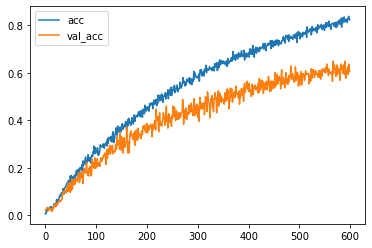

In [32]:
plt.plot(history.epoch,history.history.get('acc'),label='acc')
plt.plot(history.epoch,history.history.get('val_acc'),label='val_acc')
plt.legend()